In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Data/활성화지역진단 결과_2022-06-11 (1).xls')

In [3]:
df

,시도명,시군구명,최종 선정지역,인구사회,산업경제,물리환경,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율
0,서울특별시,서울특별시 종로구,서울특별시 종로구,O,O,O,-45.047,2,-2.564,4,76.602
1,서울특별시,서울특별시 중구,서울특별시 중구,O,O,O,-43.708,2,-7.973,3,83.795
2,서울특별시,서울특별시 용산구,서울특별시 용산구,O,X,O,-34.927,4,-1.781,2,82.572
3,서울특별시,서울특별시 성동구,서울특별시 성동구,O,X,O,-31.230,1,2.660,0,80.584
4,서울특별시,서울특별시 광진구,서울특별시 광진구,X,X,O,-8.694,2,-1.620,2,71.326
...,...,...,...,...,...,...,...,...,...,...,...
191,경상남도,경상남도 함양군,경상남도 함양군,O,X,O,-46.142,5,0.359,1,59.075
192,경상남도,경상남도 거창군,경상남도 거창군,O,X,O,-34.529,2,1.128,1,64.600
193,경상남도,경상남도 합천군,경상남도 합천군,O,O,O,-55.243,5,-5.056,2,71.404
194,제주특별자치도,제주특별자치도 제주시,제주특별자치도 제주시,X,X,O,9.994,0,4.473,0,51.365


In [4]:
df = df.replace('O', 1) #O를 1로
df = df.replace('X', 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도명        196 non-null    object 
 1   시군구명       196 non-null    object 
 2   최종 선정지역    196 non-null    object 
 3   인구사회       196 non-null    int64  
 4   산업경제       196 non-null    int64  
 5   물리환경       196 non-null    int64  
 6   과거대비인구변화   196 non-null    float64
 7   최근인구변화     196 non-null    int64  
 8   과거대비사업체변화  196 non-null    float64
 9   최근사업체변화    196 non-null    int64  
 10  노후건축물비율    196 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 17.0+ KB


In [6]:
df.columns

Index(['시도명', '시군구명', '최종 선정지역', '인구사회', '산업경제', '물리환경', '과거대비인구변화', '최근인구변화',
       '과거대비사업체변화', '최근사업체변화', '노후건축물비율'],
      dtype='object')

In [7]:
df2 = pd.read_csv('Data/국토교통부_잠재력지표_2021.csv', encoding='euc-kr')
df_act = pd.read_csv('Data/국토교통부_활성화지역진단지표시군구_2021.csv', encoding='euc-kr')

In [8]:
idx_19 = df2[df2['연도'] != 2019].index
df2 = df2.drop(idx_19)

In [9]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 257 to 2496
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   연도              229 non-null    int64  
 2   시군구명            229 non-null    object 
 3   대졸인구비율          0 non-null      float64
 4   대졸인구비율등급        0 non-null      float64
 5   여성종사자비율         229 non-null    float64
 6   여성종사자비율등급       229 non-null    float64
 7   20세미만인구성장률      229 non-null    float64
 8   20세미만인구성장률등급    229 non-null    float64
 9   투표율             0 non-null      float64
 10  투표율등급           0 non-null      float64
 11  재정자립도           229 non-null    float64
 12  재정자립도등급         229 non-null    float64
 13  경제활동인구대비종사자수    229 non-null    float64
 14  경제활동인구대비종사자수등급  229 non-null    float64
 15  1인당지역내총생산       0 non-null      float64
 16  1인당지역내총생산등급     0 non-null      float64
 17  특허출원건수          229 non-null    

In [10]:
idx_19 = df_act[df_act['연도'] != 2019].index
df_act = df_act.drop(idx_19)

In [11]:
len(df_act)

229

In [12]:
df_act = df_act.drop(['시도코드', '시도명', '연도', '기준연도'], axis=1)

In [13]:
df1 = df[['인구사회', '시군구명']]

In [14]:
df_new = pd.merge(df1, df2, how='outer', on=['시군구명'])

In [15]:
df_new=pd.merge(df_act, df_new, how='outer', on=['시군구코드'])

In [16]:
df_new['인구사회'] = df_new['인구사회'].fillna(0)

In [17]:
df_new['시도명'] =[""]*len(df_new)


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        228 non-null    float64
 3   최근인구변화          228 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   시군구명_y          229 non-null    object 
 9   연도              229 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         229 non-null    float64
 13  여성종사자비율등급       229 non-null    float64
 14  20세미만인구성장률      229 non-null    float64
 15  20세미만인구성장률등급    229 non-null    float64
 16  투표율             0 non-null      float64
 17  투표율등급           0 non-null      flo

In [19]:
for i in range(len(df_new)):
    si = df_new.iloc[i, 1].split()
    df_new.iloc[i, 48] = si[0]

In [20]:
df_new=df_new.drop(['투표율', '투표율등급', '1인당지역내총생산', '1인당지역내총생산등급'], axis=1)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        228 non-null    float64
 3   최근인구변화          228 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   시군구명_y          229 non-null    object 
 9   연도              229 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         229 non-null    float64
 13  여성종사자비율등급       229 non-null    float64
 14  20세미만인구성장률      229 non-null    float64
 15  20세미만인구성장률등급    229 non-null    float64
 16  재정자립도           229 non-null    float64
 17  재정자립도등급         229 non-null    flo

In [22]:
df_new['1인당공원면적'] = df_new['1인당공원면적'].fillna(df_new.groupby(['시도명'])['1인당공원면적'].transform('mean'))
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new.groupby(['시도명'])['건축허가면적증감률'].transform('mean'))
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new.groupby(['시도명'])['폐기물재활용률'].transform('mean'))
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new.groupby(['시도명'])['1만인당사회복지시설수'].transform('mean'))
df_new['1만인당축제건수'] = df_new['1만인당축제건수'].fillna(df_new.groupby(['시도명'])['1만인당축제건수'].transform('mean'))
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new.groupby(['시도명'])['과거대비인구변화'].transform('mean'))
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new.groupby(['시도명'])['최근인구변화'].transform('mean'))


In [23]:
df_new=df_new.drop(['대졸인구비율', '대졸인구비율등급', '시군구명_y'], axis=1)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        228 non-null    float64
 3   최근인구변화          228 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   연도              229 non-null    int64  
 9   여성종사자비율         229 non-null    float64
 10  여성종사자비율등급       229 non-null    float64
 11  20세미만인구성장률      229 non-null    float64
 12  20세미만인구성장률등급    229 non-null    float64
 13  재정자립도           229 non-null    float64
 14  재정자립도등급         229 non-null    float64
 15  경제활동인구대비종사자수    229 non-null    float64
 16  경제활동인구대비종사자수등급  229 non-null    float64
 17  특허출원건수          229 non-null    flo

In [25]:
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new['1만인당사회복지시설수'].mean())
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new['폐기물재활용률'].mean())
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new['건축허가면적증감률'].mean())
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new['과거대비인구변화'].mean())
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new['최근인구변화'].mean())



In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        229 non-null    float64
 3   최근인구변화          229 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   연도              229 non-null    int64  
 9   여성종사자비율         229 non-null    float64
 10  여성종사자비율등급       229 non-null    float64
 11  20세미만인구성장률      229 non-null    float64
 12  20세미만인구성장률등급    229 non-null    float64
 13  재정자립도           229 non-null    float64
 14  재정자립도등급         229 non-null    float64
 15  경제활동인구대비종사자수    229 non-null    float64
 16  경제활동인구대비종사자수등급  229 non-null    float64
 17  특허출원건수          229 non-null    flo

In [27]:
df_new.rename(columns={'시군구명_x' : '시군구명'}, inplace=True)
df_new = df_new.drop(['연도', '시도명', '시군구코드'], axis=1)
df_new.set_index('시군구명')

,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,여성종사자비율등급,20세미만인구성장률,20세미만인구성장률등급,...,폐기물재활용률,폐기물재활용률등급,1만인당사회복지시설수,1만인당사회복지시설수등급,1만인당문화체육시설수,1만인당문화체육시설수등급,1만인당축제건수,1만인당축제건수등급,비영리단체수,비영리단체수등급
시군구명,,,,,,,,,,,,,,,,,,,,,
강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,6.0,-2.20,10.0,...,77.03,5.0,58.000000,6.0,35.57,6.0,1.160000,7.0,6.0,1.0
전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,5.0,-4.49,10.0,...,74.41,5.0,32.498724,0.0,30.89,6.0,0.230000,3.0,79.0,6.0
경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,5.0,-6.30,10.0,...,79.50,5.0,92.860000,7.0,23.80,6.0,1.010000,7.0,6.0,1.0
경기도 남양주시,17.24,0.0,3.69,0.0,30.09,0.0,46.07,6.0,-0.19,10.0,...,90.21,6.0,12.350000,2.0,11.49,4.0,0.040000,1.0,93.0,6.0
경기도 용인시,10.86,0.0,5.89,0.0,29.98,0.0,42.46,5.0,-1.18,10.0,...,86.64,5.0,10.350000,1.0,12.70,4.0,0.170435,0.0,99.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,4.0,-3.20,10.0,...,80.99,5.0,21.760000,5.0,16.71,5.0,0.140000,1.0,42.0,4.0
경기도 안산시,-6.31,5.0,1.34,0.0,41.08,1.0,38.29,5.0,-5.30,10.0,...,75.14,5.0,7.480000,1.0,15.80,5.0,0.170435,0.0,149.0,7.0
전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,6.0,-5.91,10.0,...,95.08,6.0,32.498724,0.0,29.42,6.0,1.440000,7.0,16.0,1.0


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구명            229 non-null    object 
 1   과거대비인구변화        229 non-null    float64
 2   최근인구변화          229 non-null    float64
 3   과거대비사업체변화       229 non-null    float64
 4   최근사업체변화         229 non-null    float64
 5   노후건축물비율         229 non-null    float64
 6   인구사회            229 non-null    float64
 7   여성종사자비율         229 non-null    float64
 8   여성종사자비율등급       229 non-null    float64
 9   20세미만인구성장률      229 non-null    float64
 10  20세미만인구성장률등급    229 non-null    float64
 11  재정자립도           229 non-null    float64
 12  재정자립도등급         229 non-null    float64
 13  경제활동인구대비종사자수    229 non-null    float64
 14  경제활동인구대비종사자수등급  229 non-null    float64
 15  특허출원건수          229 non-null    float64
 16  특허출원건수등급        229 non-null    float64
 17  1인당주민세          229 non-null    flo

In [29]:
df_new.drop(df_new.columns[[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38]], axis=1, inplace=True)

In [30]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,1인당공원면적,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,6.35,0.91,202.61,-0.21,2.03,77.03,58.000000,35.57,1.160000,6.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,24.64,3.02,67.65,-9.95,-0.11,74.41,32.498724,30.89,0.230000,79.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,22.84,0.84,204.83,-41.55,-1.15,79.50,92.860000,23.80,1.010000,6.0
3,경기도 남양주시,17.24,0.0,3.69,0.0,30.09,0.0,46.07,-0.19,34.74,...,10.25,4.04,21.41,-12.19,2.79,90.21,12.350000,11.49,0.040000,93.0
4,경기도 용인시,10.86,0.0,5.89,0.0,29.98,0.0,42.46,-1.18,60.81,...,11.52,3.95,22.40,-10.60,2.19,86.64,10.350000,12.70,0.170435,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,60.78,0.81,46.99,-38.45,0.51,80.99,21.760000,16.71,0.140000,42.0
225,경기도 안산시,-6.31,5.0,1.34,0.0,41.08,1.0,38.29,-5.30,55.85,...,14.64,10.29,33.53,-24.28,-1.61,75.14,7.480000,15.80,0.170435,149.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,29.94,0.82,175.39,26.18,-1.17,95.08,32.498724,29.42,1.440000,16.0
227,제주특별자치도 서귀포시,-13.83,0.0,6.97,0.0,58.26,0.0,49.26,-1.51,36.52,...,16.73,1.86,47.45,-43.43,0.26,50.47,11.640000,29.39,0.770000,77.0


In [31]:
from sklearn.model_selection import train_test_split

feature_columns = df_new.columns.difference(['인구사회', '시군구명'])

X = df_new[feature_columns]
y = df_new['인구사회']

In [32]:
import statsmodels.api as sm

full_model = sm.OLS(y, X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   인구사회   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              104.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                    3.27e-98
Time:                        21:52:37   Log-Likelihood:                         -6.0770
No. Observations:                 229   AIC:                                      54.15
Df Residuals:                     208   BIC:                                      126.3
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1만인당공무원수        -0.0005      0.000     -0.998      0.320      -0.001       0.000
1만인당문화체육시설수      0.0005      0.002      0.338      0.736      -0.003       0.004
1만인당사회복지시설수      0.0007      0.001      0.842      0.401      -0.001       0.002
1만인당축제건수         0.0542      0.056      0.970      0.333      -0.056       0.164
1인당공원면적         -0.0015      0.001     -1.444      0.150      -0.003       0.001
1인당주민세          -0.0007      0.001     -0.762      0.447      -0.003       0.001
20세미만인구성장률       0.0155      0.011      1.358      0.176      -0.007       0.038
건축허가면적증감률     9.732e-05      0.000      0.295      0.768      -0.001       0.001
경제활동인구대비종사자수     0.2328      0.132      1.762      0.080      -0.028       0.493
과거대비사업체변화       -0.0025      0.009     -0.281      0.779      -0.020       0.015
과거대비인구변화        -0.0047      0.001     -3.222      0.001      -0.008      -0.002
노후건축물비율          0.0010      0.002      0.525      0.600      -0.003       0.005
도로밀도            -0.0042      0.005     -0.884      0.377      -0.014       0.005
비영리단체수        9.434e-05      0.000      0.293      0.770      -0.001       0.001
여성종사자비율          0.0018      0.003      0.571      0.568      -0.004       0.008
재정자립도           -0.0008      0.002     -0.345      0.731      -0.006       0.004
주민등록인구전출입률      -0.0297      0.018     -1.645      0.101      -0.065       0.006
최근사업체변화          0.0017      0.031      0.055      0.956      -0.060       0.064
최근인구변화           0.1447      0.014     10.596      0.000       0.118       0.172
특허출원건수       -2.043e-06   1.46e-05     -0.140      0.889   -3.08e-05    2.67e-05
폐기물재활용률          0.0005      0.002      0.284      0.777      -0.003       0.004
==============================================================================
Omnibus:                        1.428   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.510
Skew:                           0.153   Prob(JB):                        0.470
Kurtosis:                       2.745   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

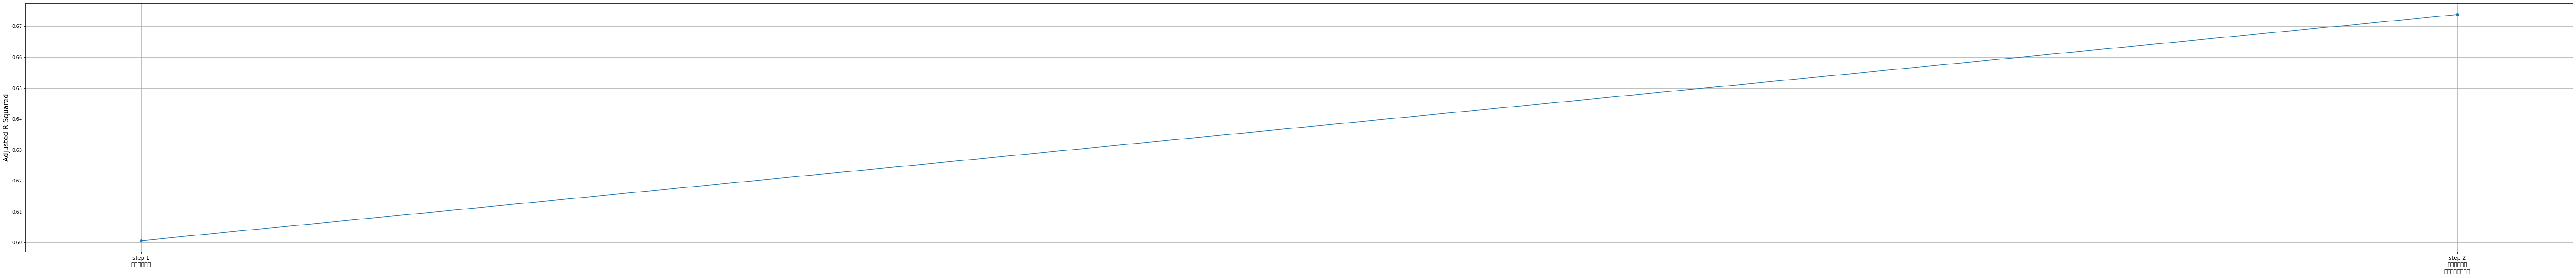

In [33]:
def stepwise_feature_selection(X_train, y_train, variables=X.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X, y)

In [34]:
model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_variables]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   인구사회   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     236.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.93e-56
Time:                        21:52:38   Log-Likelihood:                -14.294
No. Observations:                 229   AIC:                             34.59
Df Residuals:                     226   BIC:                             44.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1418      0.033      4.302      0.0

In [35]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,1인당공원면적,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,6.35,0.91,202.61,-0.21,2.03,77.03,58.000000,35.57,1.160000,6.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,24.64,3.02,67.65,-9.95,-0.11,74.41,32.498724,30.89,0.230000,79.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,22.84,0.84,204.83,-41.55,-1.15,79.50,92.860000,23.80,1.010000,6.0
3,경기도 남양주시,17.24,0.0,3.69,0.0,30.09,0.0,46.07,-0.19,34.74,...,10.25,4.04,21.41,-12.19,2.79,90.21,12.350000,11.49,0.040000,93.0
4,경기도 용인시,10.86,0.0,5.89,0.0,29.98,0.0,42.46,-1.18,60.81,...,11.52,3.95,22.40,-10.60,2.19,86.64,10.350000,12.70,0.170435,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,60.78,0.81,46.99,-38.45,0.51,80.99,21.760000,16.71,0.140000,42.0
225,경기도 안산시,-6.31,5.0,1.34,0.0,41.08,1.0,38.29,-5.30,55.85,...,14.64,10.29,33.53,-24.28,-1.61,75.14,7.480000,15.80,0.170435,149.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,29.94,0.82,175.39,26.18,-1.17,95.08,32.498724,29.42,1.440000,16.0
227,제주특별자치도 서귀포시,-13.83,0.0,6.97,0.0,58.26,0.0,49.26,-1.51,36.52,...,16.73,1.86,47.45,-43.43,0.26,50.47,11.640000,29.39,0.770000,77.0


In [37]:
from sklearn.preprocessing import StandardScaler

data = df_new[['최근인구변화', '과거대비인구변화']]

std = StandardScaler()
std_data = std.fit_transform(data)


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=3), k=None)

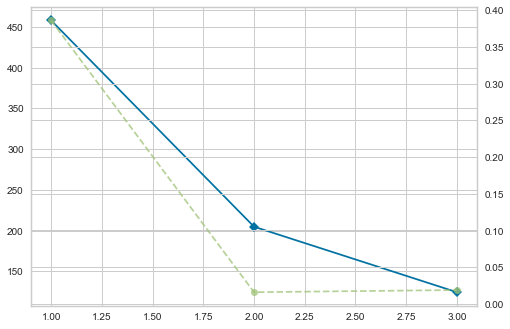

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,4))
visualizer.fit(std_data)

In [40]:
model = KMeans(n_clusters =3, random_state = 10)

In [43]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(std_data)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_new['cluster'] = model.fit_predict(std_data)

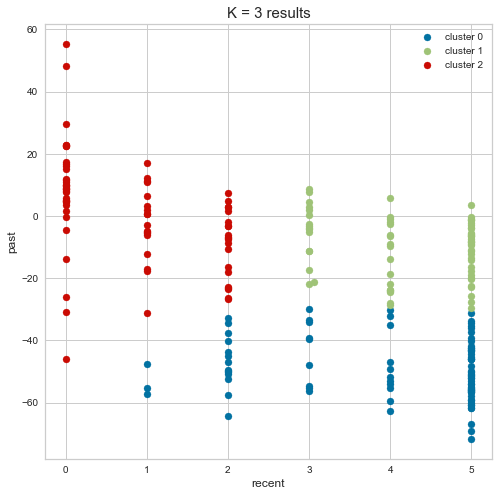

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(df_new.loc[df_new['cluster'] == i, '최근인구변화'], df_new.loc[df_new['cluster'] == i, '과거대비인구변화'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('recent', size = 12)
plt.ylabel('past', size = 12)
plt.show()

In [48]:
df_new.to_csv('clusterafter.csv')